In [1]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
%matplotlib notebook 

# Working in 3D

## Representing position

In robotics we frequently need to describe the position of objects such as robots, cameras and workpieces. 

We represent position with an SE3 object,   For example to create a translation of 1 unit in the x-direction is simply

In [2]:
T1 = SE3.Tx(1)

More correctly this is a _motion_ in 3D space which we can visualize as the blue coordinate frame

<IPython.core.display.Javascript object>


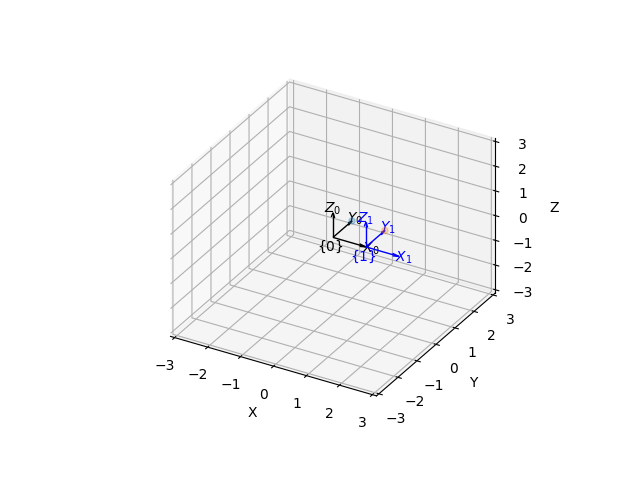

In [3]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black')
T1.plot(frame='1')

Click on the coordinate frame and use the mouse to change the viewpoint and verify that this is indeed a motion of 1 unit in the X-direction.

To consider this as a motion, as opposed to a position, think about picking up the world coordinate frame (black) which sits at the origin of this coordinate system, and carry it 1 unit in the x-direction.

Importantly we can _compose_ motions, that is perform the motions in sequence, and we denote this in python using the multiplication operator `*`. For example

In [4]:
T2 = T1 * T1

The choice of operator is arbitrary but it is a fairly common convention.  If python allowed a special operator like $\oplus$, such as used in the _Robotics, Vision & Control_ book, we could use that.  

The resulting motion, the _composition_ , is shown in blue.  It is 1 unit in the X-direction and then 1 unit in the X-direction, for a total of 2 units in the X-direction.

<IPython.core.display.Javascript object>


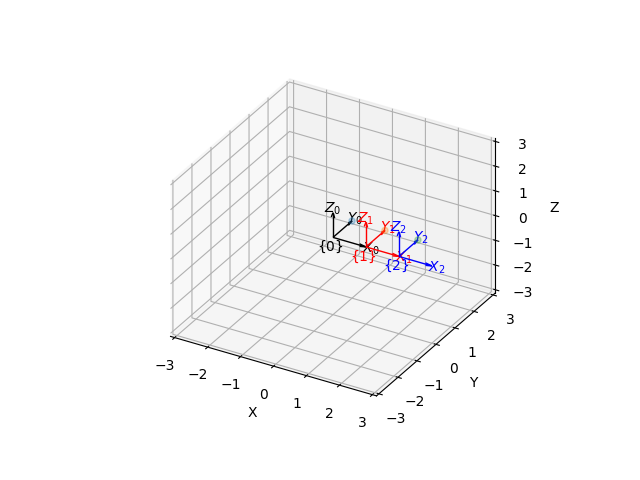

In [5]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black')
T1.plot(frame='1', color='red')
T2.plot(frame='2')

We could also have written

In [6]:
T2 = T1**2

T2 = T1
T2 *= T1

Let's look at what's inside the SE3 object

In [7]:
T2

   1           0           0           2            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            



and perhaps surprisingly we see that it's a 4x4 matrix.  We could create a motion of 4 units in the Z-direction

In [8]:
SE3.Tz(4)

   1           0           0           0            
   0           1           0           0            
   0           0           1           4            
   0           0           0           1            



and we observe some clear pattern and structure which is accentuated here by the colors.  We see that the numbers concerned with the distance moved are in blue on the right hand side.  

These matrices have a very particular structure.  We see a 3x3 identity matrix in red, and the bottom row in grey always has the same values. 

A mathematician would say these matrices are a subset of all possible real 4x4 matrices which belong to the Special Euclidean _group_ in 3 dimensions which is generally shortened to $\mbox{SE}(3)$ – hence the name of our Python class.  These matrices represent motions – often referred to as _rigid body motions_ in 3D space.  These matrices are also known as _homogeneous transformation_ matrices – a 4x4 matrix. One characteristic of these matrices is that multiplying them together causes the motions to be added.

This certainly seems like overkill for this problem – there are 16 numbers in each of these matrices and we know that only 3 are required to describe a position in 3D space.  It is also quite unintuitive since we multiplied matrices (complex) when we could have just _added_ these displacements using vectors.  Happily this has real advantages when we consider rotations in the next section so suspend your scepticism for now.

We finish off this section on position by noting that, following the earlier pattern, you can create a motion in the Z-direction by

In [9]:
SE3.Ty(3)

   1           0           0           0            
   0           1           0           3            
   0           0           1           0            
   0           0           0           1            



or we can specify motion in the X-, Y- and Z-directions in one hit. For example

In [10]:
SE3(7, 8, 9)

   1           0           0           7            
   0           1           0           8            
   0           0           1           9            
   0           0           0           1            



which is exactly the same as

In [11]:
SE3.Tx(7) * SE3.Ty(8) * SE3.Tz(9)

   1           0           0           7            
   0           1           0           8            
   0           0           1           9            
   0           0           0           1            



Those following closely might have noticed `SE3()` with no arguments which was used to position the black (world coordinate) frame.  This is simply the null motion.

Every motion has an "opposite motion" which is given by the inverse method

In [12]:
SE3.Ty(2).inv()

   1           0           0           0            
   0           1           0          -2            
   0           0           1           0            
   0           0           0           1            



So doing a motion, then the inverse motion 

In [13]:
SE3.Ty(2) * SE3.Ty(2).inv()

   1           0           0           0            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            



is a null motion.  Two steps forward, then two steps back.

Earlier we visualized an `SE3` object as a coordinate frame, not as a point.  Coordinate frames are extremely useful when thinking about problems in robotics – we typically attach them to a robot's end-effector, a camera or a drone.  They indicate not just where something is, but how it is oriented. The extra information that allows us to visualize an `SE3` object as a frame, not as a point, comes from all that extra information encoded in the SE(3) matrix.

Consider that the frame is attached to a robot, and there is a point on the robot that is at a coordinate (1,2,3) with respect to that frame.  As the frame moves, that point moves with it and changes with respect to the world coordinate frame.  Let's define the point as

In [14]:
P = [1,2,3]

which we have done with a Python list but we could also use a tuple or a numpy array. If the robot is at position of (4,5,6) then the point is _transformed_ to

In [15]:
SE3(4,5,6) * P

array([5., 7., 9.])

which is as expected.

Again, this is almost trivial, but is far from trivial when we talk about the coordinate frames that are rotated with respect to the world coordinate frame.

## Representing Rotation

The simplest rotations we can create are about one of the world coordinate axes.  For example a rotation of $\pi/4$ radians around the x-axis is given by

In [16]:
R1 = SO3.Rx(pi/4)

which we can visualize by

<IPython.core.display.Javascript object>


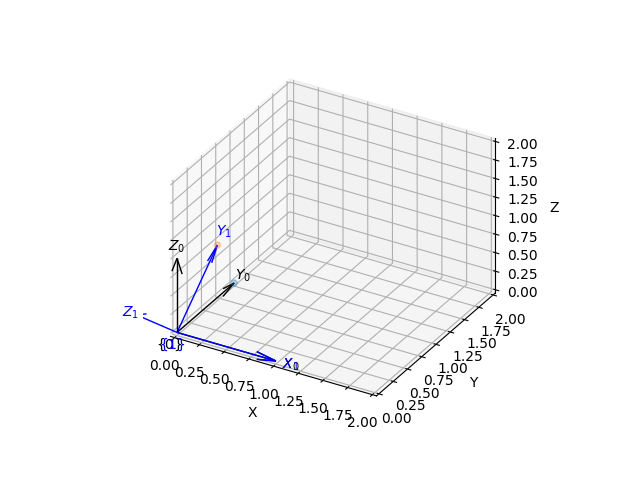

In [17]:
fig = plt.figure() # create a new figure
SE3().plot(frame='0', color='black', dims=[0,2])
R1.plot(frame='1')

If we use our earlier imagery, we have picked up the world coordinate frame and rotated it around the X-axis by positive $\pi/4$ radians (remember the right-hand rule for direction of positive rotation).

We can _compose_ these rotational motions just as we composed translational motions earlier.

In [18]:
R2 = R1 * R1

which we can visualize as

<IPython.core.display.Javascript object>


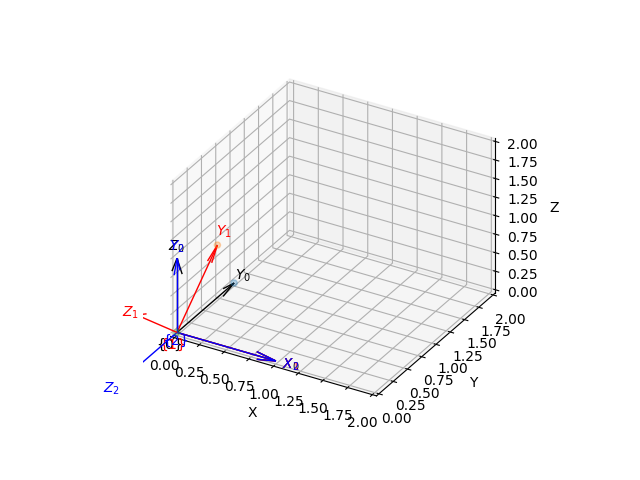

In [19]:
fig = plt.figure() # create a new figure
SE3().plot(frame='0', color='black', dims=[0,2])
R1.plot(frame='1', color='red')
R2.plot(frame='2')

which is a rotation by $\pi/4$ _then_ a rotation by $\pi/4$ which is a total of $\pi/2$.  Just to check

We could also use the exponentiation operator

In [20]:
R2 = R1**2

We could have specified the angle in degrees

In [21]:
R1 = SO3.Rx(45, 'deg')

Often we need to describe more complex orientations and we typically use a _3 angle_ convention to do this.  Euler's rotation theorem says that any orientation can be expressed in terms of three rotations about different axes.  

One common convention is roll-pitch-yaw angles

In [22]:
R3 = SO3.RPY([10, 20, 30], unit='deg')

which says that we rotate by 30&deg; about the Z-axis (yaw), _then_ 20&deg; about the Y-axis (pitch) and _then_ 10&deg; about the X-axis – this is the ZYX roll-pitch yaw convention. Other order conventions are possible, for example `order='xyz'`.

We can visualize the resulting orientation.

<IPython.core.display.Javascript object>


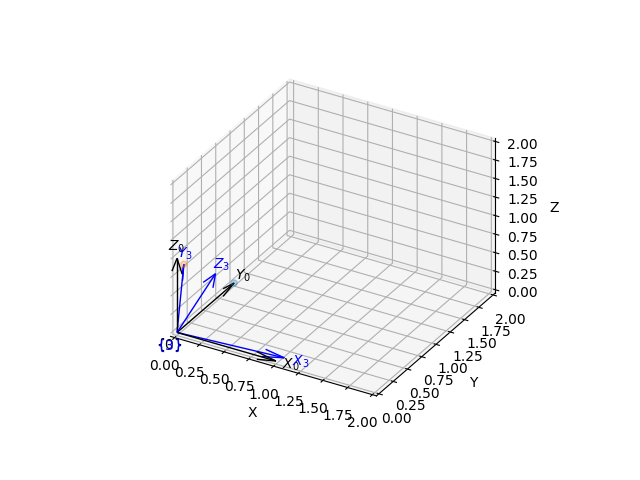

In [23]:
plt.figure() # create a new figure
SE3().plot(frame='0', color='black', dims=[0,2])
R3.plot(frame='3')

and we can convert any rotation matrix back to its 3-angle representation

In [24]:
R3.rpy(unit='deg')

array([10., 20., 30.])

Let's look at what's inside the SO3 object

In [25]:
R1

   1           0           0            
   0           0.707107   -0.707107     
   0           0.707107    0.707107     



which is again a matrix, but this time it's a 3x3 matrix.  We could create a rotation of 𝜋/4 radians about the Z-axis

In [26]:
SO3.Rz(pi/4)

   0.707107   -0.707107    0            
   0.707107    0.707107    0            
   0           0           1            



The matrices that represent rotations have a very particular structure but it is perhaps not immediately obvious.  Each column (and row) is a unit vector, and each column (and row) is orthogonal  to all the others – that is the inner product is zero.

A mathematician would say the matrices are a subset of all possible 3x3 matrices which belong to the Special Orthogonal _group_ in 3 dimensions which is generally shortened to $\mbox{SO}(3)$ – hence the name of our Python class.  These matrices represent rotations in 3D space.  These matrices are also known as _rotation_ matrices.

A very useful property of matrices in $\mbox{SO}(N)$ is that the inverse is equal to its transpose, and its determinant is always +1.

In [27]:
SO3.Rz(pi/4).inv()

   0.707107    0.707107    0            
  -0.707107    0.707107    0            
   0           0           1            



So doing a motion, then the inverse motion 

In [28]:
SO3.Rz(pi/4) * SO3.Rz(pi/4).inv()

   1           0           0            
   0           1           0            
   0           0           1            



is a null rotation:  $\pi/4$ radians one way, then $\pi/4$ radians back again.

The default constructor yields a null rotation

In [29]:
SO3()

   1           0           0            
   0           1           0            
   0           0           1            



A number of other constructors provide convenient ways to describe a rotation

| Constructor   |  rotation |
|---------------|-----------|
| SO3.Rx(theta)  |  about X-axis |
| SO3.Ry(theta)  |  about Y-axis|
| SO3.Rz(theta)  |  about Z-axis|
| SO3.RPY(rpy)  |  from roll-pitch-yaw angle vector|
| SO3.Eul(euler)  | from Euler angle vector |
| SO3.AngVec(theta, v)  | from rotation and axis |
| SO3.Exp(v)  | from a twist vector |
| SO3.OA  | from orientation and approach vectors |

Imagine we want a rotation that describes a frame that has its y-axis (o-vector) pointing in the world negative z-axis direction and its z-axis (a-vector) pointing in the world x-axis direction

In [30]:
SO3.OA(o=[0,0,-1], a=[1,0,0])

   0           0           1            
  -1           0           0            
   0          -1           0            



We can redo our earlier example using the explicit angle-axis notation

In [31]:
SO3.AngVec(pi/4, [1,0,0])

   1           0           0            
   0           0.707107   -0.707107     
   0           0.707107    0.707107     



or a more complex example

In [32]:
SO3.AngVec(30, [1,2,3], unit='deg')

   0.875595   -0.381753    0.29597      
   0.420031    0.904304   -0.0762129    
  -0.238552    0.191048    0.952152     



A rotation matrix has an inverse (in this case its transpose)

## Representing pose

We have discussed how `SE3` objects can represent position and how `SO3` objects can represent rotation.  You might recall that the SE3 matrix had a 3x3 component (colored red) to it and as you can probably guess that is actually an SO(3) matrix as we've just discussed. The SE(3) group is a superset if you like, of the SO(3) group.  The latter can represent orientation, whereas the SE(3) is also able to represent position. The combination of position and orientation is known as _pose_.

In [33]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')

Is a composition of two motions: a translation and _then_ a rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example Out[20] was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

<IPython.core.display.Javascript object>


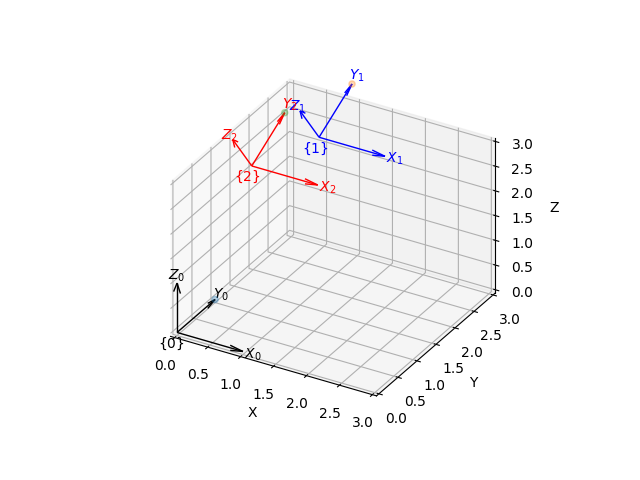

In [34]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,3], color='black')
T1.plot(frame='1')

The order of rotation is really important. If we reverse the two motions

In [35]:
T2 = SE3.Rx(30, 'deg') * SE3(1, 2, 3)

we see the result is different.  In this case we turned first, then moved so we followed a different path

In [36]:
T2.plot(frame='2', color='red')

Consider again a point which is attached to, or defined relative to the coordinate frame {1}.

In [37]:
P = [1, 2, 1]

In the world coordinate frame its coordinate is

In [38]:
T1 * P

array([2.        , 3.23205081, 4.8660254 ])

where the position vector representing the point, has been premultiplied by the homogeneous transformation `T`. The point has been rotated and translated.

The vector is given here as a list but could also be a numpy array.  If the frame is denoted by {A} then our rotation matrix is ${}^0 \mathbf{T}_A$ so a point ${}^A P$ defined with respect to frame {A} is transformed as ${}^0 P = {}^0 \mathbf{T}_A\,{}^A P$.  


Now lets imagine the point P is defined with respect to the world coordinate frame.  To find its position with respect to frame {1} is simply

In [39]:
T1.inv() * P

array([ 0.        , -1.        , -1.73205081])

where the inverse (computed in an efficient manner based on the structure of the matrix)

An SE3 instance has a number of properties, many of which are _inherited_ from the SO3 class.  For example the columns of the rotation are often written as $[n, o, a]$

In [40]:
T1.n

array([1., 0., 0.])

We can extract the rotation matrix as a numpy array

In [41]:
T1.R

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

or the translation vector, as a numpy array

In [42]:
T1.t

array([1., 2., 3.])

which has 3 elements because it is a translation in 3D space.

### A couple of important points:

When we compose motions they must be of the same type.  An `SE3` object can represent pure transation, pure rotation or both.  If we wish to compose a translation with a rotation, the rotation must be an `SE3` object with zero translation.

As we remakred earlier.  representing an orientation with 9 numbers is inefficient, and representing 3 translation values with a total of 16 numbers is even more wasteful.  But there's some serious magic possible

which is displayed in a color coded fashion: rotation matrix in red, translation vector in blue, and the constant bottom row in grey.

but class supports a number of variant constructors using static methods.  `SO3.Rx()` shown above is one of these but there are also

| Constructor   |  motion |
|---------------|-----------|
| SE3()      | null motion |
| SE3(x, y, z) | pure translation in the X-, Y- and Z-directions |
| SE3.Tx(d)  |  translation along X-axis |
| SE3.Ty(d)  |  translation along Y-axis |
| SE3.Tz(d)  |  translation along Z-axis |
| SE3.Rx(theta)  |  rotation about X-axis |
| SE3.Ry(theta)  |  rotation about Y-axis|
| SE3.Rz(theta)  |  rotation about Z-axis|
| SE3.RPY(rpy)  |  rotation from roll-pitch-yaw angle vector|
| SE3.Eul(euler)  | rotation from Euler angle vector |
| SE3.AngVec(theta, v)  | rotation from rotation and axis |
| SE3.OA(ovec, avec)  | rotation from orientation and approach vectors |

### Transforming points

Imagine now a set of points defining the vertices of a cube

In [43]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

defined with respect to a rotationg reference frame ${}^A P_i$.  Given a rotation ${}^0 \mathbf{T}_A$ as above, we determine the coordinates of the points in the world frame by ${}^0 P_i = ({}^0 \mathbf{T}_A)^{-1} {}^0 P_i$ which we can do in a single operation

In [44]:
Q = T1 * P

which we could then plot.

<IPython.core.display.Javascript object>


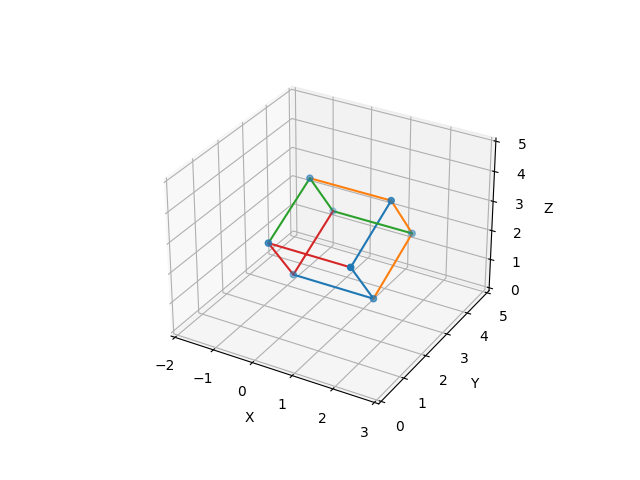

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices

# draw lines joining the vertices
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
ax.set_xlim3d(-2, 3); ax.set_ylim3d(0, 5); ax.set_zlim3d(0, 5);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])

## Multi-valued objects

For many tasks we might want to have a set or sequence of rotations or poses. The obvious solution would be to use a Python list

In [46]:
T = [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)]

but the pose objects in this package can hold multiple values, just like a native Python list can.  There are a few ways to do this, most obviously

In [47]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )

which has the type of a pose object

In [48]:
type(T)

spatialmath.pose3d.SE3

but it has length of five

In [49]:
len(T)

5

that is, it contains five values.  We can see these when we display the object's value

In [50]:
T

[0] =
   1           0           0           0            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            
[1] =
   1           0           0           0            
   0           0.995004   -0.0998334   0            
   0           0.0998334   0.995004    0            
   0           0           0           1            
[2] =
   1           0           0           0            
   0           0.980067   -0.198669    0            
   0           0.198669    0.980067    0            
   0           0           0           1            
[3] =
   1           0           0           0            
   0           0.955336   -0.29552     0            
   0           0.29552     0.955336    0            
   0           0           0           1            
[4] =
   1           0           0           0            
   0           0.921061   -0.389418    0            
   0           0

We can index into the object (slice it) just as we would a Python list

In [51]:
T[3]

   1           0           0           0            
   0           0.955336   -0.29552     0            
   0           0.29552     0.955336    0            
   0           0           0           1            



or from the second element to the last in steps of two

In [52]:
T[1:-1:2]

[0] =
   1           0           0           0            
   0           0.995004   -0.0998334   0            
   0           0.0998334   0.995004    0            
   0           0           0           1            
[1] =
   1           0           0           0            
   0           0.955336   -0.29552     0            
   0           0.29552     0.955336    0            
   0           0           0           1            



We could another value to the end

In [53]:
T.append( SE3.Rx(0.5) )
len(T)

6

and we we see that the length has increased.  The value just appended would be `T[5]`

The `SE3` class, like all the classes in the spatialmath package, inherits from the `UserList` class giving it all the methods of a Python list like `append`, `extend`, `insert`, `pop`, `del`, `clear`, `reverse`.

We could write the above example more succinctly as

In [54]:
T = SE3.Rx( np.linspace(0, 0.5, 5) )
len(T)

5

Consider another rotation

In [55]:
T2 = SE3.Ry(40, 'deg')

then we can write

In [56]:
A = T * T2
len(A)

5

which has produced a new list where each element of `A` is the `T[i] * T2`.  Similarly

In [57]:
B = T2 * T
len(B)

5

which has produced a new list where each element of `B` is the `T2 * T[i]`.

And perhaps not surprisingly 

In [58]:
C = T * T
len(C)

5

which has produced a new list where each element of `C` is the product `T[i] * T[i]`.

We can apply such a sequence to a coordinate vectors as we did earlier

In [59]:
P = T * [0, 1, 0]
P

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.99219767, 0.96891242, 0.93050762, 0.87758256],
       [0.        , 0.12467473, 0.24740396, 0.36627253, 0.47942554]])

where each element of `T` has transformed the 3D coordinate vector $(0, 1, 0)$, the results being consecutive columns of the resulting numpy array.  Note that:
 * the vector  has been implicitly considered as a column vector, 
 * the vector can be given as a list (as in this case) or as a NumPy array

Imagine now that we wanted to display the cube we showed earlier, for each value in the pose object, we simply use a `for` loop

In [60]:
for x in T:
    Q = x * P
    # plot(Q)

and we can also use these pose objects inside list comprehensions

In [61]:
np.array([ x * [0,1,0] for x in T])

array([[0.        , 1.        , 0.        ],
       [0.        , 0.99219767, 0.12467473],
       [0.        , 0.96891242, 0.24740396],
       [0.        , 0.93050762, 0.36627253],
       [0.        , 0.87758256, 0.47942554]])

## Representing rotation another way

### Quaternions

A quaternion is classically considered as a type of complex number, but it is more useful to consider it as an ordered pair comprising a scalar and a vector.  We can create two quaternions

In [62]:
q1 = Quaternion([1,2,3,4])
q1

1.000000 < 2.000000, 3.000000, 4.000000 >


and

In [63]:
q2 = Quaternion([5,6,7,8])
q2

5.000000 < 6.000000, 7.000000, 8.000000 >


where the scalar is before the angle brackets which enclose the vector part.  Operators allow us to add quaternions

In [64]:
q1 + q2

6.000000 < 8.000000, 10.000000, 12.000000 >


or subtract quaternions

In [65]:
q1 - q2

-4.000000 < -4.000000, -4.000000, -4.000000 >


which is simply performed element-wise.

We can multiply quaternions

In [66]:
q1 * q2

-60.000000 < 12.000000, 30.000000, 24.000000 >


and this is not s and follows the rules of Hamilton multiplication.

Properties allow us to extra the scalar part

In [67]:
q1.s

1.0

and the vector part

In [68]:
q1.v

array([2., 3., 4.])

and we can represent it as a numpy array

In [69]:
q1.vec

array([1., 2., 3., 4.])

A quaternion has a conjugate

In [70]:
q1.conj()

1.000000 < -2.000000, -3.000000, -4.000000 >


and a norm, which is the magnitude of the equivalent 4-vector 

In [71]:
q1.norm()

5.477225575051661

which is also the square root of the scalar part of this product

In [72]:
q1 * q1.conj()

30.000000 < 0.000000, 0.000000, 0.000000 >


A pure quaternion is a quaternuin with a zero scalar part

In [73]:
Quaternion.Pure([1, 2, 3])

0.000000 < 1.000000, 2.000000, 3.000000 >


### Unit quaternion

A quaternion with a unit norm is called a unit quaternion and can be used to represent rotation in 3D space.

In [74]:
q1 = UnitQuaternion.Rx(30, 'deg')
q1

0.965926 << 0.258819, 0.000000, 0.000000 >>


the convention is that unit quaternions are denoted with double angle brackets.  The norm, as advertised is indeed one

In [77]:
q1.norm()

1.0

We create another unit quaternion

In [78]:
q2 = UnitQuaternion.Ry(-40, 'deg')
q2

0.939693 << 0.000000, -0.342020, 0.000000 >>


The rotations can be composed by quaternion multiplication

In [79]:
q3 = q1 * q2
q3

0.907673 << 0.243210, -0.330366, -0.088521 >>


We can convert a quaternion to a rotation matrix

In [80]:
q3.R

array([[ 7.66044443e-01, -2.77555756e-17, -6.42787610e-01],
       [-3.21393805e-01,  8.66025404e-01, -3.83022222e-01],
       [ 5.56670399e-01,  5.00000000e-01,  6.63413948e-01]])

which yields exactly the same answer as if we'd done it using SO(3) rotation matrices

In [81]:
SO3.Rx(30, 'deg') * SO3.Ry(-40, 'deg')

   0.766044    0          -0.642788     
  -0.321394    0.866025   -0.383022     
   0.55667     0.5         0.663414     



The advantages of unit quaternions are that

1. they are compact, just 4 numbers instead of 9
2. multiplication involves fewer operations and is therefore faster
3. numerical errors build up when we multiply rotation matrices together many times, and they lose the structure (the columns are no longer unit length or orthogonal).  Correcting this, the process of _normalization_ is expensive.  For unit quaternions errors will also compound, but normalization is simply a matter of dividing through by the norm

Unit quaternions have an inverse

In [82]:
q2.inv()

0.939693 << -0.000000, 0.342020, -0.000000 >>


In [83]:
q1 * q2.inv()

0.907673 << 0.243210, 0.330366, 0.088521 >>


or

In [84]:
q1 / q2

0.907673 << 0.243210, 0.330366, 0.088521 >>


We can convert to an SO3 object if we wish

In [85]:
q1.SO3()

   1           0           0            
   0           0.866025   -0.5          
   0           0.5         0.866025     



A unit quaternion is not a minimal representation. Since we know the magnitude is 1, then with any 3 elements we can compute the fourth upto a sign ambiguity. 

In [86]:
q1.vec3

array([0.25881905, 0.        , 0.        ])

In [87]:
a = UnitQuaternion.qvmul( q1.vec3, q2.vec3)
a

array([ 0.24321035, -0.33036609, -0.08852133])

from which we can recreate the unit quaternion

In [88]:
UnitQuaternion.Vec3(a)

0.907673 << 0.243210, -0.330366, -0.088521 >>


This is often used in SLAM and bundle adjustment algorithms since it is compact and better behaved than using roll-pitch-yaw or Euler angles.

# Working in 2D

Things are actually much simpler in 2D.  There's only one possible rotation which is around an axis perpendicular to the plane (where the z-axis would have been if it were in 3D).

Rotations in 2D can be represented by rotation matrices – 2x2 orthonormal matrices – which belong to the group SO(2). Just as for the 3D case these matrices have special properties, each column (and row) is a unit vector, and they are all orthogonal, the inverse of this matrix is equal to its transpose, and its determinant is +1.

We can create such a matrix, a rotation of $\pi/4$ radians by

In [91]:
R = SO2(pi/4)
R

   0.707107   -0.707107     
   0.707107    0.707107     



or in degrees

In [92]:
SO2(45, unit='deg')

   0.707107   -0.707107     
   0.707107    0.707107     



and we can plot this on the 2D plane

<IPython.core.display.Javascript object>


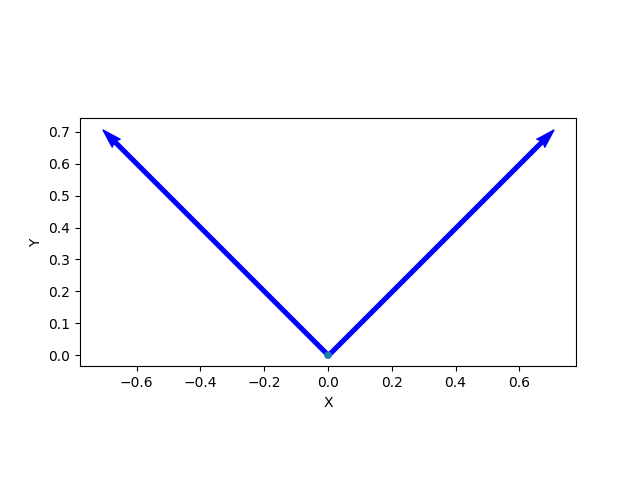

In [93]:
plt.figure() # create a new figure
R.plot()

Once again, it's useful to describe the position of things and we do this this with a homogeneous transformation matrix – a 3x3 matrix – which belong to the group SE(2).

In [94]:
T = SE2(1, 2)
T

   1           0           1            
   0           1           2            
   0           0           1            



which has a similar structure to the 3D case.  The rotation matrix is in the top-left corner and the translation components are in the right-most column.

We can also call the function with the elements in a list

In [95]:
T = SE2([1, 2])

<IPython.core.display.Javascript object>


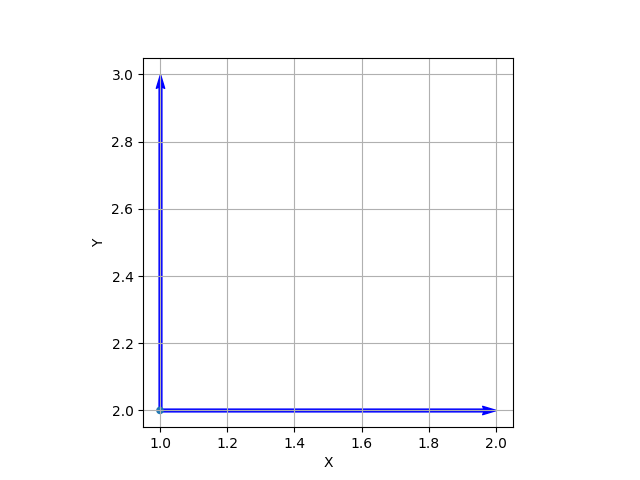

In [96]:
plt.figure() # create a new figure
T.plot()
plt.grid(True)

In [102]:
T = SE2(1, 2) * SE2(45, unit='deg')
T

   0.707107   -0.707107    1            
   0.707107    0.707107    2            
   0           0           1            



<IPython.core.display.Javascript object>


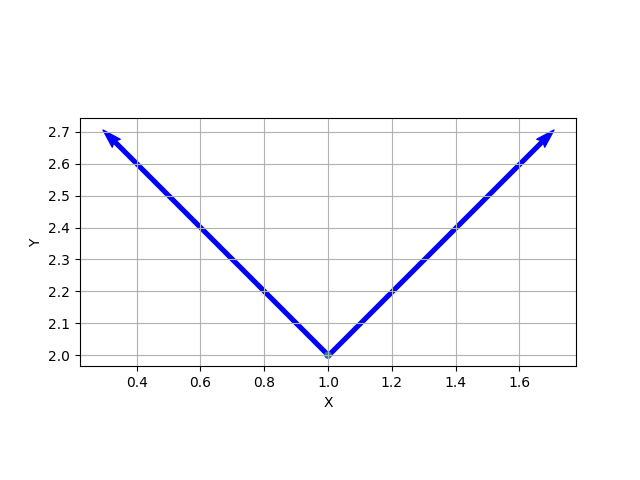

In [103]:
plt.figure() # create a new figure
T.plot()
plt.grid(True)